# Flipkart Smartphones-EDA and Selling Price Prediction using LR

In [2]:
# Trainging Accuracy 0.8937153056259114
# Testing Accuracy 0.926017419634463
# Model-Linear Regression(Multiple)

In [ ]:
# Module Alization (Import Numpy, Padas, Matplotlib, Seaborn Libraries)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read Dataset for Analysis

In [11]:
data = pd.read_csv('flipkart_smartphones.csv')
data

,title,ram,brand,url,product_id,listing_id,highlights,availability,selling_price,original_price,currency,avg_rating,ratings_count,reviews_count,one_stars_count,two_stars_count,three_stars_count,four_stars_count,five_stars_count
0,"POCO C31 (Royal Blue, 64 GB)",4 GB RAM,POCO,https://www.flipkart.com/poco-c31-royal-blue-6...,MOBG73E7GKQK4KZP,LSTMOBG73E7GKQK4KZPR5ICMK,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB ...,IN_STOCK,8999,11999,INR,4.4,34176,1957,1675,838,2678,6707,22278
1,"POCO C31 (Shadow Gray, 64 GB)",4 GB RAM,POCO,https://www.flipkart.com/poco-c31-shadow-gray-...,MOBG73E7UBFXXMCH,LSTMOBG73E7UBFXXMCHSM0ZN5,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB ...,IN_STOCK,8999,11999,INR,4.4,34176,1957,1675,838,2678,6707,22278
2,"realme C35 (Glowing Green, 64 GB)",4 GB RAM,realme,https://www.flipkart.com/realme-c35-glowing-gr...,MOBGBTHFSKHF8RAU,LSTMOBGBTHFSKHF8RAUQONXWY,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB 16...,IN_STOCK,11999,13999,INR,4.4,8563,590,590,200,487,1303,5983
3,"OPPO K10 (Black Carbon, 128 GB)",6 GB RAM,OPPO,https://www.flipkart.com/oppo-k10-black-carbon...,MOBGCFUHMDFSCM9W,LSTMOBGCFUHMDFSCM9WSL0U8O,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB 1...,COMING_SOON,14990,18999,INR,0.0,0,0,0,0,0,0,0
4,"MOTOROLA G60 (Soft Silver, 128 GB)",6 GB RAM,MOTOROLA,https://www.flipkart.com/motorola-g60-soft-sil...,MOBG9CJ6G5GCFAH4,LSTMOBG9CJ6G5GCFAH4CCXVXL,6 GB RAM | 128 GB ROM 17.22 cm (6.78 inch) Ful...,IN_STOCK,16999,21999,INR,4.2,85746,8753,7080,2754,6671,19500,49741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,"OPPO A37f (Black, 16 GB)",2 GB RAM,OPPO,https://www.flipkart.com/oppo-a37f-black-16-gb...,MOBEWMAUFU9AFWUH,LSTMOBEWMAUFU9AFWUHHNTLTZ,2 GB RAM | 16 GB ROM | Expandable Upto 128 GB ...,COMING_SOON,9990,10990,INR,4.2,11537,1952,891,456,1134,2427,6629
843,"KARBONN K9 Kavach (Champagne, 16 GB)",2 GB RAM,KARBONN,https://www.flipkart.com/karbonn-k9-kavach-cha...,MOBFYJC5CM5MHRMJ,LSTMOBFYJC5CM5MHRMJQGWAWV,2 GB RAM | 16 GB ROM | Expandable Upto 32 GB 1...,COMING_SOON,7490,7490,INR,4.1,2897,258,294,131,291,451,1730
844,"OPPO Reno2 (Ocean Blue, 256 GB)",8 GB RAM,OPPO,https://www.flipkart.com/oppo-reno2-ocean-blue...,MOBFJY8YRNGGZPVD,LSTMOBFJY8YRNGGZPVDUGG2GJ,8 GB RAM | 256 GB ROM | Expandable Upto 256 GB...,COMING_SOON,39990,39990,INR,4.4,1648,199,106,41,101,279,1121
845,"SAMSUNG Galaxy A53 (Light Blue, 128 GB)",8 GB RAM,SAMSUNG,https://www.flipkart.com/samsung-galaxy-a53-li...,MOBGCFVYUHHUJFNY,LSTMOBGCFVYUHHUJFNY6GCQII,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB 1...,PRE_ORDER,35999,40999,INR,0.0,0,0,0,0,0,0,0


In [3]:
# Fetch first 5 records from dataset

In [12]:
data.head()

,title,ram,brand,url,product_id,listing_id,highlights,availability,selling_price,original_price,currency,avg_rating,ratings_count,reviews_count,one_stars_count,two_stars_count,three_stars_count,four_stars_count,five_stars_count
0,"POCO C31 (Royal Blue, 64 GB)",4 GB RAM,POCO,https://www.flipkart.com/poco-c31-royal-blue-6...,MOBG73E7GKQK4KZP,LSTMOBG73E7GKQK4KZPR5ICMK,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB ...,IN_STOCK,8999,11999,INR,4.4,34176,1957,1675,838,2678,6707,22278
1,"POCO C31 (Shadow Gray, 64 GB)",4 GB RAM,POCO,https://www.flipkart.com/poco-c31-shadow-gray-...,MOBG73E7UBFXXMCH,LSTMOBG73E7UBFXXMCHSM0ZN5,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB ...,IN_STOCK,8999,11999,INR,4.4,34176,1957,1675,838,2678,6707,22278
2,"realme C35 (Glowing Green, 64 GB)",4 GB RAM,realme,https://www.flipkart.com/realme-c35-glowing-gr...,MOBGBTHFSKHF8RAU,LSTMOBGBTHFSKHF8RAUQONXWY,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB 16...,IN_STOCK,11999,13999,INR,4.4,8563,590,590,200,487,1303,5983
3,"OPPO K10 (Black Carbon, 128 GB)",6 GB RAM,OPPO,https://www.flipkart.com/oppo-k10-black-carbon...,MOBGCFUHMDFSCM9W,LSTMOBGCFUHMDFSCM9WSL0U8O,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB 1...,COMING_SOON,14990,18999,INR,0.0,0,0,0,0,0,0,0
4,"MOTOROLA G60 (Soft Silver, 128 GB)",6 GB RAM,MOTOROLA,https://www.flipkart.com/motorola-g60-soft-sil...,MOBG9CJ6G5GCFAH4,LSTMOBG9CJ6G5GCFAH4CCXVXL,6 GB RAM | 128 GB ROM 17.22 cm (6.78 inch) Ful...,IN_STOCK,16999,21999,INR,4.2,85746,8753,7080,2754,6671,19500,49741


In [ ]:
# Fetch last 5 records from dataset

In [13]:
data.tail()

,title,ram,brand,url,product_id,listing_id,highlights,availability,selling_price,original_price,currency,avg_rating,ratings_count,reviews_count,one_stars_count,two_stars_count,three_stars_count,four_stars_count,five_stars_count
842,"OPPO A37f (Black, 16 GB)",2 GB RAM,OPPO,https://www.flipkart.com/oppo-a37f-black-16-gb...,MOBEWMAUFU9AFWUH,LSTMOBEWMAUFU9AFWUHHNTLTZ,2 GB RAM | 16 GB ROM | Expandable Upto 128 GB ...,COMING_SOON,9990,10990,INR,4.2,11537,1952,891,456,1134,2427,6629
843,"KARBONN K9 Kavach (Champagne, 16 GB)",2 GB RAM,KARBONN,https://www.flipkart.com/karbonn-k9-kavach-cha...,MOBFYJC5CM5MHRMJ,LSTMOBFYJC5CM5MHRMJQGWAWV,2 GB RAM | 16 GB ROM | Expandable Upto 32 GB 1...,COMING_SOON,7490,7490,INR,4.1,2897,258,294,131,291,451,1730
844,"OPPO Reno2 (Ocean Blue, 256 GB)",8 GB RAM,OPPO,https://www.flipkart.com/oppo-reno2-ocean-blue...,MOBFJY8YRNGGZPVD,LSTMOBFJY8YRNGGZPVDUGG2GJ,8 GB RAM | 256 GB ROM | Expandable Upto 256 GB...,COMING_SOON,39990,39990,INR,4.4,1648,199,106,41,101,279,1121
845,"SAMSUNG Galaxy A53 (Light Blue, 128 GB)",8 GB RAM,SAMSUNG,https://www.flipkart.com/samsung-galaxy-a53-li...,MOBGCFVYUHHUJFNY,LSTMOBGCFVYUHHUJFNY6GCQII,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB 1...,PRE_ORDER,35999,40999,INR,0.0,0,0,0,0,0,0,0
846,"YU Ace (Rose Gold, 16 GB)",2 GB RAM,YU,https://www.flipkart.com/yu-ace-rose-gold-16-g...,MOBF8HV9DHJJYXGH,LSTMOBF8HV9DHJJYXGHDFOVEF,2 GB RAM | 16 GB ROM | Expandable Upto 128 GB ...,COMING_SOON,7999,7999,INR,4.1,66103,8270,5079,3100,8228,15374,34322


In [ ]:
# Check Number of rows and Columns present in dataset

In [14]:
data.shape

(847, 19)

In [8]:
# check all coulmns

In [15]:
data.columns

Index(['title', 'ram', 'brand', 'url', 'product_id', 'listing_id',
       'highlights', 'availability', 'selling_price', 'original_price',
       'currency', 'avg_rating', 'ratings_count', 'reviews_count',
       'one_stars_count', 'two_stars_count', 'three_stars_count',
       'four_stars_count', 'five_stars_count'],
      dtype='object')

In [ ]:
# Check abstract summary of dataset like column, null values, count and datatype of every column.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              847 non-null    object 
 1   ram                746 non-null    object 
 2   brand              847 non-null    object 
 3   url                847 non-null    object 
 4   product_id         847 non-null    object 
 5   listing_id         847 non-null    object 
 6   highlights         847 non-null    object 
 7   availability       847 non-null    object 
 8   selling_price      847 non-null    int64  
 9   original_price     847 non-null    int64  
 10  currency           847 non-null    object 
 11  avg_rating         847 non-null    float64
 12  ratings_count      847 non-null    int64  
 13  reviews_count      847 non-null    int64  
 14  one_stars_count    847 non-null    int64  
 15  two_stars_count    847 non-null    int64  
 16  three_stars_count  847 non

In [11]:
# Check descriptive summary of dataset

In [17]:
data.describe()

,selling_price,original_price,avg_rating,ratings_count,reviews_count,one_stars_count,two_stars_count,three_stars_count,four_stars_count,five_stars_count
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,24810.768595,27748.353011,4.178749,37161.184179,2989.429752,1866.495868,894.140496,2582.670602,7494.469894,24323.407320
std,27771.028820,28466.642669,0.723661,85815.344152,6679.098769,4000.221087,2150.423879,6398.502806,17820.229766,56116.528438
min,3780.000000,4999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10990.000000,12999.000000,4.200000,874.500000,70.000000,63.000000,23.500000,61.000000,142.500000,542.500000
50%,15499.000000,17999.000000,4.300000,4237.000000,441.000000,331.000000,141.000000,357.000000,922.000000,2658.000000
75%,24999.000000,27999.000000,4.400000,31605.000000,2910.500000,1848.000000,821.500000,2435.000000,6750.500000,20303.500000
max,179900.000000,179900.000000,5.000000,912314.000000,71867.000000,36443.000000,20581.000000,63157.000000,181356.000000,610777.000000


In [ ]:
# check whether is any null/NA value present in any column or not

In [18]:
data.isnull().sum()

title                  0
ram                  101
brand                  0
url                    0
product_id             0
listing_id             0
highlights             0
availability           0
selling_price          0
original_price         0
currency               0
avg_rating             0
ratings_count          0
reviews_count          0
one_stars_count        0
two_stars_count        0
three_stars_count      0
four_stars_count       0
five_stars_count       0
dtype: int64

In [ ]:
# From above analysis ram column containg 101 NA values, so drop it parmanatly as it is not required for data visualization.

In [19]:
data.dropna(inplace=True)

In [20]:
data.isnull().sum()

title                0
ram                  0
brand                0
url                  0
product_id           0
listing_id           0
highlights           0
availability         0
selling_price        0
original_price       0
currency             0
avg_rating           0
ratings_count        0
reviews_count        0
one_stars_count      0
two_stars_count      0
three_stars_count    0
four_stars_count     0
five_stars_count     0
dtype: int64

In [22]:
# Check number of unique records from dataset

In [21]:
data.nunique()

title                651
ram                    7
brand                 26
url                  746
product_id           746
listing_id           746
highlights           453
availability           4
selling_price        301
original_price       126
currency               1
avg_rating            19
ratings_count        374
reviews_count        333
one_stars_count      323
two_stars_count      283
three_stars_count    325
four_stars_count     352
five_stars_count     377
dtype: int64

In [ ]:
# We want to fetch unique brand bcoz we want to predit selling and price of all manufacturre

In [22]:
data['brand'].unique()

array(['POCO', 'realme', 'OPPO', 'MOTOROLA', 'REDMI', 'SAMSUNG', 'vivo',
       'Infinix', 'Mi', 'GIONEE', 'Itel', 'Micromax', 'Tecno',
       'MarQ By Flipkart', 'LAVA', 'Nokia', 'TCL', 'ASUS', 'Panasonic',
       'Alcatel', 'Maplin', 'YU', 'Coolpad', 'XOLO', 'Jmax', 'KARBONN'],
      dtype=object)

In [24]:
# From Above I choose REDMI or analysis, Lets do it.

In [23]:
redmi_smartphone = data[data['brand']=='REDMI']
redmi_smartphone

,title,ram,brand,url,product_id,listing_id,highlights,availability,selling_price,original_price,currency,avg_rating,ratings_count,reviews_count,one_stars_count,two_stars_count,three_stars_count,four_stars_count,five_stars_count
11,"REDMI 10 (Caribbean Green, 128 GB)",6 GB RAM,REDMI,https://www.flipkart.com/redmi-10-caribbean-gr...,MOBGC9GYQVJHKH76,LSTMOBGC9GYQVJHKH76RVBIUJ,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB 1...,IN_STOCK,12999,16999,INR,4.6,16,1,0,1,1,1,13
13,"REDMI 10 (Midnight Black, 128 GB)",6 GB RAM,REDMI,https://www.flipkart.com/redmi-10-midnight-bla...,MOBGC9GYX2QQXKWK,LSTMOBGC9GYX2QQXKWKNFGDX0,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB 1...,IN_STOCK,12999,16999,INR,4.6,16,1,0,1,1,1,13
16,"REDMI 9i Sport (Carbon Black, 64 GB)",4 GB RAM,REDMI,https://www.flipkart.com/redmi-9i-sport-carbon...,MOBG6WQWRGRRDBH6,LSTMOBG6WQWRGRRDBH6DJKEOT,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB ...,IN_STOCK,8799,9999,INR,4.4,81335,4395,3656,1843,5979,15995,53862
35,"REDMI 9i Sport (Coral Green, 64 GB)",4 GB RAM,REDMI,https://www.flipkart.com/redmi-9i-sport-coral-...,MOBG6WQWJRFZ5WDG,LSTMOBG6WQWJRFZ5WDGO4EIDO,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB ...,IN_STOCK,8799,9999,INR,4.4,81335,4395,3656,1843,5979,15995,53862
42,"REDMI Note 10 Pro (Dark Night, 128 GB)",6 GB RAM,REDMI,https://www.flipkart.com/redmi-note-10-pro-dar...,MOBGB725PZQVNSUH,LSTMOBGB725PZQVNSUHEA1OVQ,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,IN_STOCK,16999,19999,INR,4.3,5451,441,352,134,331,1243,3391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,"REDMI Note 10 (Aqua Green, 128 GB)",6 GB RAM,REDMI,https://www.flipkart.com/redmi-note-10-aqua-gr...,MOBGF47CCGXUZPAP,LSTMOBGF47CCGXUZPAPD1469S,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,IN_STOCK,16680,17999,INR,4.3,7113,521,483,203,550,1544,4333
704,"REDMI Note 9 (Scarlet Red, 128 GB)",6 GB RAM,REDMI,https://www.flipkart.com/redmi-note-9-scarlet-...,MOBFUNP3DYNG7HX2,LSTMOBFUNP3DYNG7HX2OSJVTJ,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,IN_STOCK,17990,18999,INR,4.3,6204,421,371,168,439,1358,3868
760,"REDMI Note 10T 5G (Metallic Blue, 64 GB)",4 GB RAM,REDMI,https://www.flipkart.com/redmi-note-10t-5g-met...,MOBG5GQZXZBKERSW,LSTMOBG5GQZXZBKERSWLNBIFD,4 GB RAM | 64 GB ROM 16.51 cm (6.5 inch) Full ...,IN_STOCK,13474,16999,INR,4.2,1526,104,140,38,118,293,937
793,"REDMI NOTE 10 LITE (Aurora Blue, 128 GB)",6 GB RAM,REDMI,https://www.flipkart.com/redmi-note-10-lite-au...,MOBG8YVAGZVXE86F,LSTMOBG8YVAGZVXE86F2KDM22,6 GB RAM | 128 GB ROM 16.94 cm (6.67 inch) Dis...,IN_STOCK,18490,19999,INR,4.3,534,46,36,12,31,130,325


In [ ]:
# Redmi first 5 records

In [24]:
redmi_smartphone.head()

,title,ram,brand,url,product_id,listing_id,highlights,availability,selling_price,original_price,currency,avg_rating,ratings_count,reviews_count,one_stars_count,two_stars_count,three_stars_count,four_stars_count,five_stars_count
11,"REDMI 10 (Caribbean Green, 128 GB)",6 GB RAM,REDMI,https://www.flipkart.com/redmi-10-caribbean-gr...,MOBGC9GYQVJHKH76,LSTMOBGC9GYQVJHKH76RVBIUJ,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB 1...,IN_STOCK,12999,16999,INR,4.6,16,1,0,1,1,1,13
13,"REDMI 10 (Midnight Black, 128 GB)",6 GB RAM,REDMI,https://www.flipkart.com/redmi-10-midnight-bla...,MOBGC9GYX2QQXKWK,LSTMOBGC9GYX2QQXKWKNFGDX0,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB 1...,IN_STOCK,12999,16999,INR,4.6,16,1,0,1,1,1,13
16,"REDMI 9i Sport (Carbon Black, 64 GB)",4 GB RAM,REDMI,https://www.flipkart.com/redmi-9i-sport-carbon...,MOBG6WQWRGRRDBH6,LSTMOBG6WQWRGRRDBH6DJKEOT,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB ...,IN_STOCK,8799,9999,INR,4.4,81335,4395,3656,1843,5979,15995,53862
35,"REDMI 9i Sport (Coral Green, 64 GB)",4 GB RAM,REDMI,https://www.flipkart.com/redmi-9i-sport-coral-...,MOBG6WQWJRFZ5WDG,LSTMOBG6WQWJRFZ5WDGO4EIDO,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB ...,IN_STOCK,8799,9999,INR,4.4,81335,4395,3656,1843,5979,15995,53862
42,"REDMI Note 10 Pro (Dark Night, 128 GB)",6 GB RAM,REDMI,https://www.flipkart.com/redmi-note-10-pro-dar...,MOBGB725PZQVNSUH,LSTMOBGB725PZQVNSUHEA1OVQ,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,IN_STOCK,16999,19999,INR,4.3,5451,441,352,134,331,1243,3391


In [ ]:
# Redmi Last 5 records

In [25]:
redmi_smartphone.tail()

,title,ram,brand,url,product_id,listing_id,highlights,availability,selling_price,original_price,currency,avg_rating,ratings_count,reviews_count,one_stars_count,two_stars_count,three_stars_count,four_stars_count,five_stars_count
682,"REDMI Note 10 (Aqua Green, 128 GB)",6 GB RAM,REDMI,https://www.flipkart.com/redmi-note-10-aqua-gr...,MOBGF47CCGXUZPAP,LSTMOBGF47CCGXUZPAPD1469S,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,IN_STOCK,16680,17999,INR,4.3,7113,521,483,203,550,1544,4333
704,"REDMI Note 9 (Scarlet Red, 128 GB)",6 GB RAM,REDMI,https://www.flipkart.com/redmi-note-9-scarlet-...,MOBFUNP3DYNG7HX2,LSTMOBFUNP3DYNG7HX2OSJVTJ,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,IN_STOCK,17990,18999,INR,4.3,6204,421,371,168,439,1358,3868
760,"REDMI Note 10T 5G (Metallic Blue, 64 GB)",4 GB RAM,REDMI,https://www.flipkart.com/redmi-note-10t-5g-met...,MOBG5GQZXZBKERSW,LSTMOBG5GQZXZBKERSWLNBIFD,4 GB RAM | 64 GB ROM 16.51 cm (6.5 inch) Full ...,IN_STOCK,13474,16999,INR,4.2,1526,104,140,38,118,293,937
793,"REDMI NOTE 10 LITE (Aurora Blue, 128 GB)",6 GB RAM,REDMI,https://www.flipkart.com/redmi-note-10-lite-au...,MOBG8YVAGZVXE86F,LSTMOBG8YVAGZVXE86F2KDM22,6 GB RAM | 128 GB ROM 16.94 cm (6.67 inch) Dis...,IN_STOCK,18490,19999,INR,4.3,534,46,36,12,31,130,325
829,"REDMI Note 10S (Deep Sea Blue, 128 GB)",8 GB RAM,REDMI,https://www.flipkart.com/redmi-note-10s-deep-s...,MOBG3YW35FNJZJGY,LSTMOBG3YW35FNJZJGY9SET8M,8 GB RAM | 128 GB ROM 16.33 cm (6.43 inch) Ful...,IN_STOCK,17288,20999,INR,4.2,2615,237,205,86,221,543,1560


In [ ]:
# Count and display total type (Models and its configuration) of redmi handset

In [26]:
redmi_smartphone['title'].value_counts()

REDMI Note 10S (Deep Sea Blue, 128 GB)            4
REDMI Note 10 Pro (Dark Night, 128 GB)            3
REDMI Note 10 Pro (Vintage Bronze, 128 GB)        3
REDMI Note 10S (Cosmic Purple, 128 GB)            3
REDMI Note 10S (Frost White, 128 GB)              3
REDMI Note 10S (Shadow Black, 128 GB)             2
REDMI Note 10T 5G (Graphite Black, 128 GB)        2
REDMI Note 11S (Horizon Blue, 128 GB)             2
REDMI Note 11S (Polar White, 128 GB)              2
REDMI Note 10 Pro (Glacial Blue, 128 GB)          2
REDMI NOTE 10 LITE (Champagne Gold, 128 GB)       2
REDMI NOTE 10 LITE (Aurora Blue, 128 GB)          2
REDMI Note 10T 5G (Chromium White, 64 GB)         2
REDMI Note 10T 5G (Mint Green, 64 GB)             2
REDMI 9 Power (Blazing Blue, 128 GB)              2
REDMI Note 10T 5G (Metallic Blue, 128 GB)         2
REDMI Note 10S (Cosmic Purple, 64 GB)             2
REDMI Note 10T 5G (Metallic Blue, 64 GB)          2
REDMI Note 10S (Frost White, 64 GB)               2
REDMI 10 (Pa

In [30]:
redmi_smartphone['title'].value_counts().sum()

83

In [ ]:
# Applying reindexing over redmi 

In [27]:
redmi_smartphone.index = range(len(redmi_smartphone.index))
redmi_smartphone.index

RangeIndex(start=0, stop=83, step=1)

In [33]:
redmi_smartphone.head()

,title,ram,brand,url,product_id,listing_id,highlights,availability,selling_price,original_price,currency,avg_rating,ratings_count,reviews_count,one_stars_count,two_stars_count,three_stars_count,four_stars_count,five_stars_count
0,"REDMI 10 (Caribbean Green, 128 GB)",6 GB RAM,REDMI,https://www.flipkart.com/redmi-10-caribbean-gr...,MOBGC9GYQVJHKH76,LSTMOBGC9GYQVJHKH76RVBIUJ,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB 1...,IN_STOCK,12999,16999,INR,4.6,16,1,0,1,1,1,13
1,"REDMI 10 (Midnight Black, 128 GB)",6 GB RAM,REDMI,https://www.flipkart.com/redmi-10-midnight-bla...,MOBGC9GYX2QQXKWK,LSTMOBGC9GYX2QQXKWKNFGDX0,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB 1...,IN_STOCK,12999,16999,INR,4.6,16,1,0,1,1,1,13
2,"REDMI 9i Sport (Carbon Black, 64 GB)",4 GB RAM,REDMI,https://www.flipkart.com/redmi-9i-sport-carbon...,MOBG6WQWRGRRDBH6,LSTMOBG6WQWRGRRDBH6DJKEOT,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB ...,IN_STOCK,8799,9999,INR,4.4,81335,4395,3656,1843,5979,15995,53862
3,"REDMI 9i Sport (Coral Green, 64 GB)",4 GB RAM,REDMI,https://www.flipkart.com/redmi-9i-sport-coral-...,MOBG6WQWJRFZ5WDG,LSTMOBG6WQWJRFZ5WDGO4EIDO,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB ...,IN_STOCK,8799,9999,INR,4.4,81335,4395,3656,1843,5979,15995,53862
4,"REDMI Note 10 Pro (Dark Night, 128 GB)",6 GB RAM,REDMI,https://www.flipkart.com/redmi-note-10-pro-dar...,MOBGB725PZQVNSUH,LSTMOBGB725PZQVNSUHEA1OVQ,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,IN_STOCK,16999,19999,INR,4.3,5451,441,352,134,331,1243,3391


In [34]:
redmi_smartphone.tail()

,title,ram,brand,url,product_id,listing_id,highlights,availability,selling_price,original_price,currency,avg_rating,ratings_count,reviews_count,one_stars_count,two_stars_count,three_stars_count,four_stars_count,five_stars_count
78,"REDMI Note 10 (Aqua Green, 128 GB)",6 GB RAM,REDMI,https://www.flipkart.com/redmi-note-10-aqua-gr...,MOBGF47CCGXUZPAP,LSTMOBGF47CCGXUZPAPD1469S,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,IN_STOCK,16680,17999,INR,4.3,7113,521,483,203,550,1544,4333
79,"REDMI Note 9 (Scarlet Red, 128 GB)",6 GB RAM,REDMI,https://www.flipkart.com/redmi-note-9-scarlet-...,MOBFUNP3DYNG7HX2,LSTMOBFUNP3DYNG7HX2OSJVTJ,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,IN_STOCK,17990,18999,INR,4.3,6204,421,371,168,439,1358,3868
80,"REDMI Note 10T 5G (Metallic Blue, 64 GB)",4 GB RAM,REDMI,https://www.flipkart.com/redmi-note-10t-5g-met...,MOBG5GQZXZBKERSW,LSTMOBG5GQZXZBKERSWLNBIFD,4 GB RAM | 64 GB ROM 16.51 cm (6.5 inch) Full ...,IN_STOCK,13474,16999,INR,4.2,1526,104,140,38,118,293,937
81,"REDMI NOTE 10 LITE (Aurora Blue, 128 GB)",6 GB RAM,REDMI,https://www.flipkart.com/redmi-note-10-lite-au...,MOBG8YVAGZVXE86F,LSTMOBG8YVAGZVXE86F2KDM22,6 GB RAM | 128 GB ROM 16.94 cm (6.67 inch) Dis...,IN_STOCK,18490,19999,INR,4.3,534,46,36,12,31,130,325
82,"REDMI Note 10S (Deep Sea Blue, 128 GB)",8 GB RAM,REDMI,https://www.flipkart.com/redmi-note-10s-deep-s...,MOBG3YW35FNJZJGY,LSTMOBG3YW35FNJZJGY9SET8M,8 GB RAM | 128 GB ROM 16.33 cm (6.43 inch) Ful...,IN_STOCK,17288,20999,INR,4.2,2615,237,205,86,221,543,1560


In [ ]:
# Now lets take another column ram and split it in differnt column bcoz we requird only RAM value

In [31]:
redmi_smartphone['ram'] # Here this column dtype is int + str(object), we require only rem value so lets take it.

0     6 GB RAM
1     6 GB RAM
2     4 GB RAM
3     4 GB RAM
4     6 GB RAM
        ...   
78    6 GB RAM
79    6 GB RAM
80    4 GB RAM
81    6 GB RAM
82    8 GB RAM
Name: ram, Length: 83, dtype: object

In [28]:
new = redmi_smartphone['ram'].str.split(' ',n=2, expand=True)

In [29]:
redmi_smartphone['ram_val'] = new[0] 

C:\Users\Admin\AppData\Local\Temp/ipykernel_7980/3646637014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  redmi_smartphone['ram_val'] = new[0]


In [30]:
redmi_smartphone['ram_val'].head()

0    6
1    6
2    4
3    4
4    6
Name: ram_val, dtype: object

In [42]:
# As its data type is object change it into integer

In [32]:
redmi_smartphone['ram_val'] = redmi_smartphone['ram_val'].astype(int)

C:\Users\Admin\AppData\Local\Temp/ipykernel_7980/2632542732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  redmi_smartphone['ram_val'] = redmi_smartphone['ram_val'].astype(int)


In [33]:
redmi_smartphone.head()

,title,ram,brand,url,product_id,listing_id,highlights,availability,selling_price,original_price,currency,avg_rating,ratings_count,reviews_count,one_stars_count,two_stars_count,three_stars_count,four_stars_count,five_stars_count,ram_val
0,"REDMI 10 (Caribbean Green, 128 GB)",6 GB RAM,REDMI,https://www.flipkart.com/redmi-10-caribbean-gr...,MOBGC9GYQVJHKH76,LSTMOBGC9GYQVJHKH76RVBIUJ,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB 1...,IN_STOCK,12999,16999,INR,4.6,16,1,0,1,1,1,13,6
1,"REDMI 10 (Midnight Black, 128 GB)",6 GB RAM,REDMI,https://www.flipkart.com/redmi-10-midnight-bla...,MOBGC9GYX2QQXKWK,LSTMOBGC9GYX2QQXKWKNFGDX0,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB 1...,IN_STOCK,12999,16999,INR,4.6,16,1,0,1,1,1,13,6
2,"REDMI 9i Sport (Carbon Black, 64 GB)",4 GB RAM,REDMI,https://www.flipkart.com/redmi-9i-sport-carbon...,MOBG6WQWRGRRDBH6,LSTMOBG6WQWRGRRDBH6DJKEOT,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB ...,IN_STOCK,8799,9999,INR,4.4,81335,4395,3656,1843,5979,15995,53862,4
3,"REDMI 9i Sport (Coral Green, 64 GB)",4 GB RAM,REDMI,https://www.flipkart.com/redmi-9i-sport-coral-...,MOBG6WQWJRFZ5WDG,LSTMOBG6WQWJRFZ5WDGO4EIDO,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB ...,IN_STOCK,8799,9999,INR,4.4,81335,4395,3656,1843,5979,15995,53862,4
4,"REDMI Note 10 Pro (Dark Night, 128 GB)",6 GB RAM,REDMI,https://www.flipkart.com/redmi-note-10-pro-dar...,MOBGB725PZQVNSUH,LSTMOBGB725PZQVNSUHEA1OVQ,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,IN_STOCK,16999,19999,INR,4.3,5451,441,352,134,331,1243,3391,6


In [34]:
redmi_smartphone.tail()

,title,ram,brand,url,product_id,listing_id,highlights,availability,selling_price,original_price,currency,avg_rating,ratings_count,reviews_count,one_stars_count,two_stars_count,three_stars_count,four_stars_count,five_stars_count,ram_val
78,"REDMI Note 10 (Aqua Green, 128 GB)",6 GB RAM,REDMI,https://www.flipkart.com/redmi-note-10-aqua-gr...,MOBGF47CCGXUZPAP,LSTMOBGF47CCGXUZPAPD1469S,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,IN_STOCK,16680,17999,INR,4.3,7113,521,483,203,550,1544,4333,6
79,"REDMI Note 9 (Scarlet Red, 128 GB)",6 GB RAM,REDMI,https://www.flipkart.com/redmi-note-9-scarlet-...,MOBFUNP3DYNG7HX2,LSTMOBFUNP3DYNG7HX2OSJVTJ,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,IN_STOCK,17990,18999,INR,4.3,6204,421,371,168,439,1358,3868,6
80,"REDMI Note 10T 5G (Metallic Blue, 64 GB)",4 GB RAM,REDMI,https://www.flipkart.com/redmi-note-10t-5g-met...,MOBG5GQZXZBKERSW,LSTMOBG5GQZXZBKERSWLNBIFD,4 GB RAM | 64 GB ROM 16.51 cm (6.5 inch) Full ...,IN_STOCK,13474,16999,INR,4.2,1526,104,140,38,118,293,937,4
81,"REDMI NOTE 10 LITE (Aurora Blue, 128 GB)",6 GB RAM,REDMI,https://www.flipkart.com/redmi-note-10-lite-au...,MOBG8YVAGZVXE86F,LSTMOBG8YVAGZVXE86F2KDM22,6 GB RAM | 128 GB ROM 16.94 cm (6.67 inch) Dis...,IN_STOCK,18490,19999,INR,4.3,534,46,36,12,31,130,325,6
82,"REDMI Note 10S (Deep Sea Blue, 128 GB)",8 GB RAM,REDMI,https://www.flipkart.com/redmi-note-10s-deep-s...,MOBG3YW35FNJZJGY,LSTMOBG3YW35FNJZJGY9SET8M,8 GB RAM | 128 GB ROM 16.33 cm (6.43 inch) Ful...,IN_STOCK,17288,20999,INR,4.2,2615,237,205,86,221,543,1560,8


In [35]:
# Now lets draw redmi title vs avg rating (out of 5) using barchart

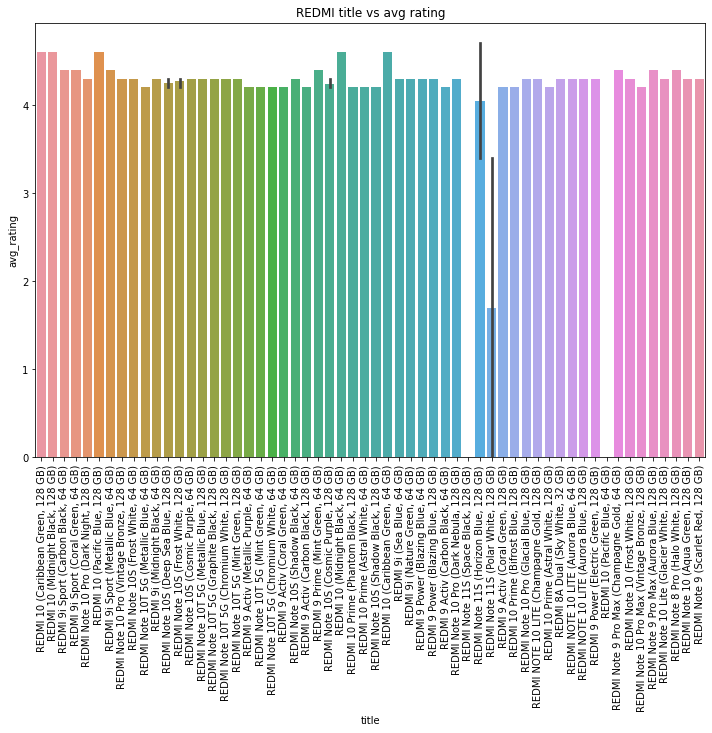

In [36]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90) # For vertical labels on x axis 
sns.barplot(x = redmi_smartphone.title,y = redmi_smartphone.avg_rating)
plt.title('REDMI title vs avg rating')
plt.show()

In [ ]:
# Lets compare REDMI Title vs ratings count

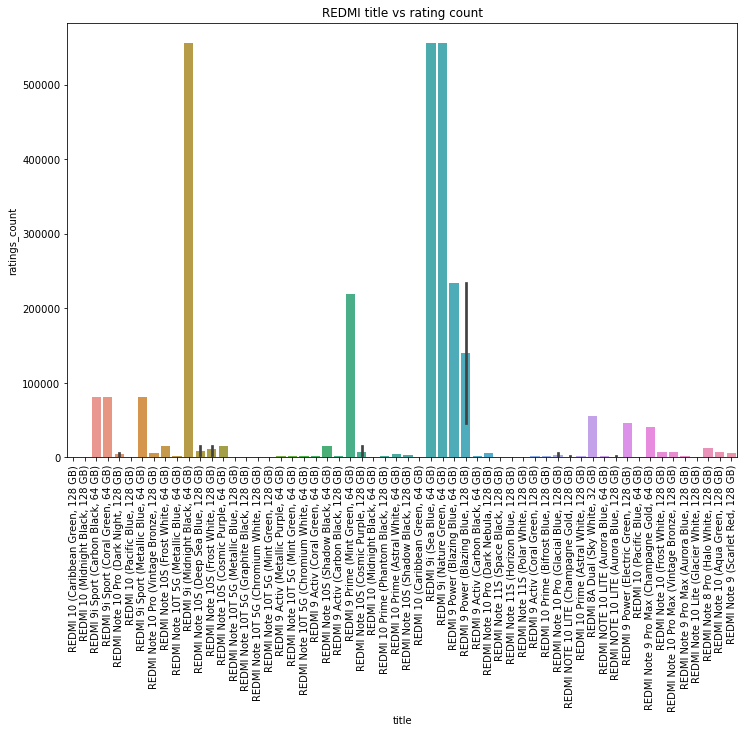

In [50]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(x = redmi_smartphone.title,y = redmi_smartphone.ratings_count)
plt.title('REDMI title vs rating count')
plt.show()

In [51]:
# lets compare REDMI Title vs ram value

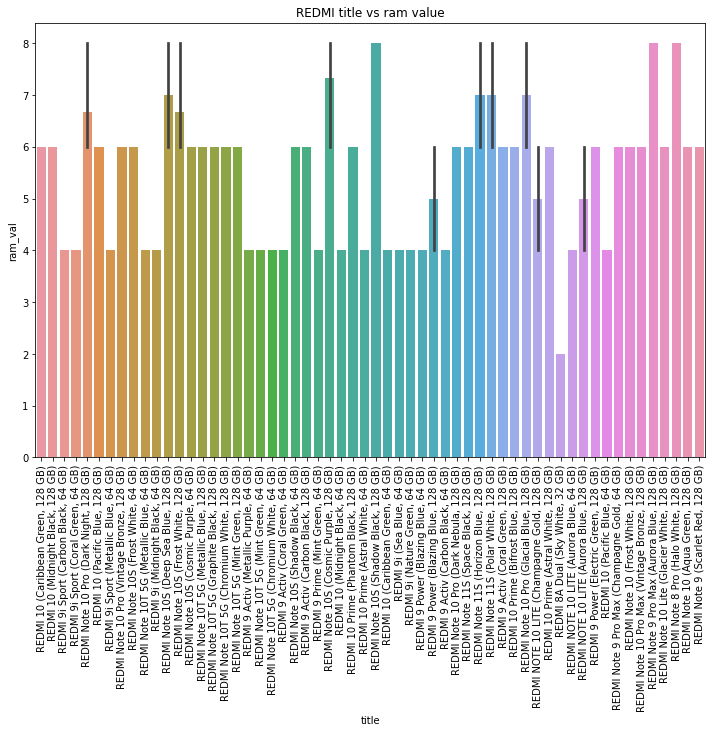

In [53]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(x = redmi_smartphone.title,y = redmi_smartphone.ram_val)
plt.title('REDMI title vs ram value')
plt.show()

In [54]:
# Lets compaire REDMI Title vs Selling price

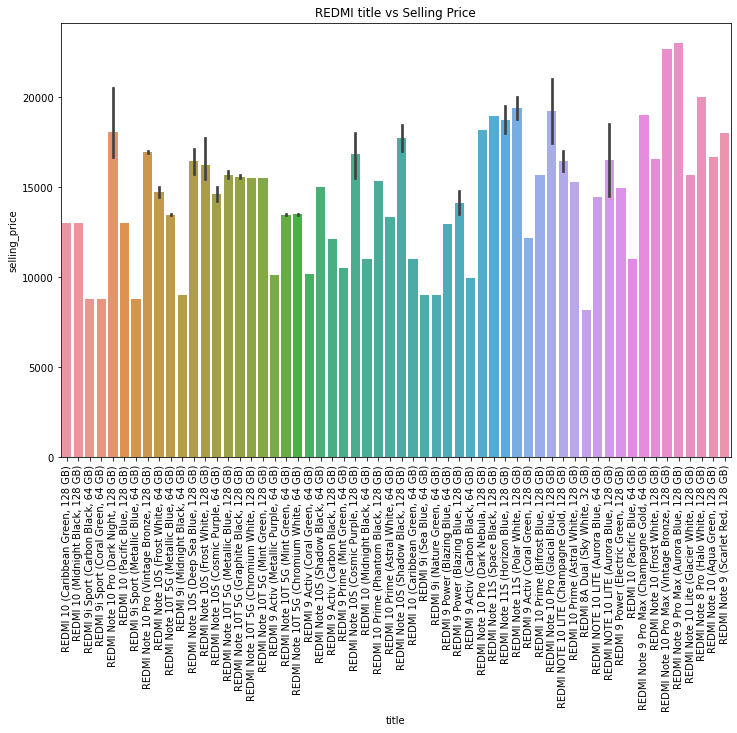

In [56]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(x = redmi_smartphone.title,y = redmi_smartphone.selling_price)
plt.title('REDMI title vs Selling Price')
plt.show()

In [ ]:
# Lets compaire REDMI Title vs Original price

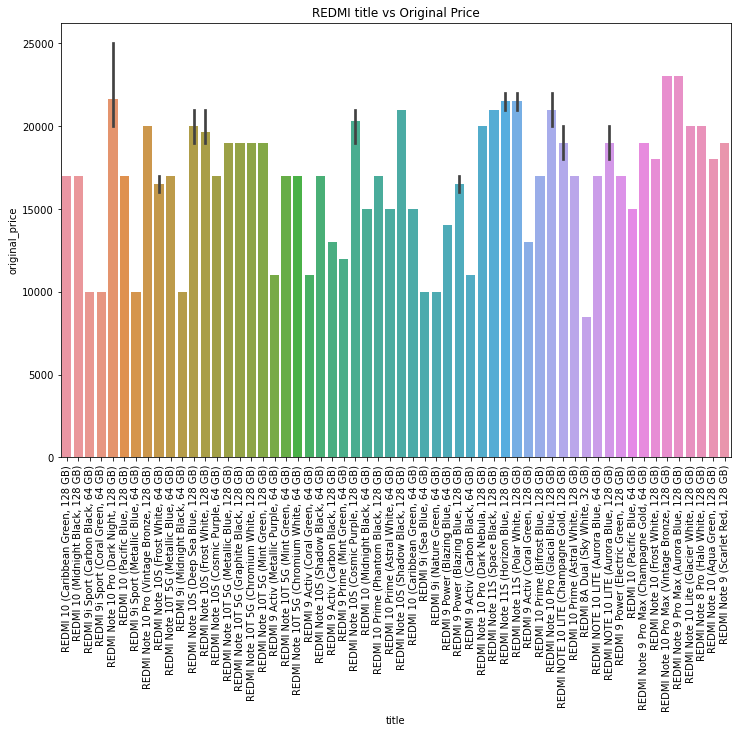

In [61]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(x = redmi_smartphone.title,y = redmi_smartphone.original_price)
plt.title('REDMI title vs Original Price')
plt.show()

In [59]:
# Lets Apply multi-Linear Regression on this analysis because we want to pradict selling price prediction.

# x = input- we take [original_price,avg_rating,ratings_count,reviews_count,one_stars_count,two_stars_count,three_stars_count,four_stars_count,five_stars_count,ram_val]
# y = original output- selling Price

In [77]:
x = redmi_smartphone.drop(['title', 'ram','brand','url','product_id','listing_id','highlights','availability','selling_price','currency'],axis=1)
y= redmi_smartphone['selling_price']

In [78]:
x.shape

(83, 10)

In [79]:
y.shape

(83,)

In [ ]:
# import sklearn libraries for the purpose of regression and splitting data

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [87]:
# Lets Split data for training and testing purpose

In [93]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [91]:
model_Redmi = LinearRegression() # Linear Regression
model_Redmi.fit(x,y) # Training of Data

LinearRegression()

In [92]:
print('Trainging Accuracy',model_Redmi.score(X_train,y_train))
print('Testing Accuracy',model_Redmi.score(X_test,y_test))

Trainging Accuracy 0.8937153056259114
Testing Accuracy 0.926017419634463


In [94]:
print('Coefficient',model_Redmi.coef_)
print('Interception',model_Redmi.intercept_)

Coefficient [ 8.42315002e-01 -8.29447236e+01  4.15201906e-01  2.19273271e+00
 -3.83308885e+00  6.63225275e+00 -5.94854621e-01 -1.56023499e+00
 -2.28872376e-01  2.56855281e+02]
Interception -931.4982076208889


In [96]:
pre = model_Redmi.predict(x)
pre

array([14556.93825363, 14556.93825363,  8930.13174398,  8930.13174398,
       16955.78900013, 14556.93825363,  8930.13174398, 16955.78900013,
       14690.20795508, 13901.30815843,  8928.71999092, 16374.83795927,
       16374.83795927, 14690.20795508, 16206.48466721, 16206.48466721,
       16206.48466721, 16206.48466721,  8995.55116178, 13901.30815843,
       13901.30815843,  8995.55116178, 14690.20795508, 14690.20795508,
       11214.04200502, 16374.83795927, 11246.31077355, 18517.05870828,
       12353.9838232 , 14658.10848792, 18517.05870828, 12369.05203724,
       18517.05870828, 13901.30815843, 16206.48466721, 12353.9838232 ,
        8928.71999092, 18517.05870828,  8928.71999092, 18517.05870828,
       12959.61941118, 14644.24941537, 16955.78900013,  8995.55116178,
       16955.78900013, 18517.05870828, 13901.30815843, 18297.40620493,
       19367.33565551, 19367.33565551, 18297.40620493, 11214.04200502,
       14658.10848792, 15254.0471892 , 21769.41571151, 16374.83795927,
      

In [97]:
from sklearn.metrics import mean_squared_error
print('by function', mean_squared_error(y,model_Redmi.predict(x)))

by function 1050679.4536276395
